In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
df = pd.read_excel('Fitness Club Data V4.xlsx')


# Convert 'Enrolldt' column to a datetime object
df['enrolldt'] = pd.to_datetime(df['enrolldt'], format='%Y%m%d')


print(df)

        enrolldt      price    downpmt  monthdue      pmttype  use  age  \
0     2019-01-01  1830.2340   210.0000       6.0   CreditCard    1    0   
1     2019-01-01  1296.6660  1296.6660       6.0         Cash    0    0   
2     2019-01-01   930.4428   105.0000       5.0         Cash    0    0   
3     2019-01-02   798.3696   199.5924       9.0  DirectDebit    0    0   
4     2019-01-03  1206.2400   210.0000       9.0       Cheque    0    0   
...          ...        ...        ...       ...          ...  ...  ...   
24838 2019-12-06     0.0000     0.0000       4.0   CreditCard    1   99   
24839 2019-12-06     0.0000     0.0000      10.0  DirectDebit    0   99   
24840 2019-12-21     0.0000     0.0000      10.0   CreditCard    1   99   
24841 2020-03-06     0.0000     0.0000       0.0       Cheque    0   99   
24842 2020-06-06     0.0000     0.0000       9.5  DirectDebit    0   99   

       gender  default  
0           0        0  
1           0        0  
2           0        0  

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic summary statistics
summary_stats = df.describe()
summary_stats

,enrolldt,price,downpmt,monthdue,use,age,gender,default
count,24843,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000,24843.000000
mean,2020-03-15 02:03:10.411785984,843.073475,167.852609,8.287290,1.944371,29.203317,0.501993,0.115042
min,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-08-25 00:00:00,587.160000,41.160000,5.500000,0.000000,22.000000,0.000000,0.000000
50%,2020-03-26 00:00:00,839.160000,84.000000,6.000000,1.000000,28.000000,1.000000,0.000000
75%,2020-10-08 00:00:00,1049.160000,147.000000,9.000000,3.000000,36.000000,1.000000,0.000000
max,2021-03-31 00:00:00,7871.850000,7871.850000,120.000000,8.000000,99.000000,1.000000,1.000000
std,NaN,368.948806,281.767279,7.108381,2.315550,13.277721,0.500006,0.319080


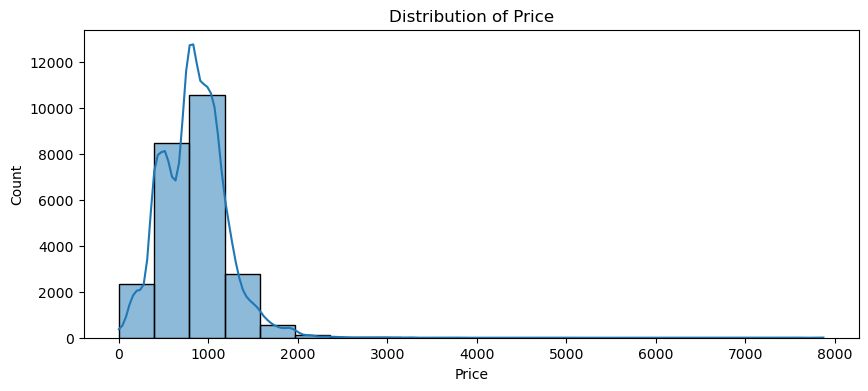

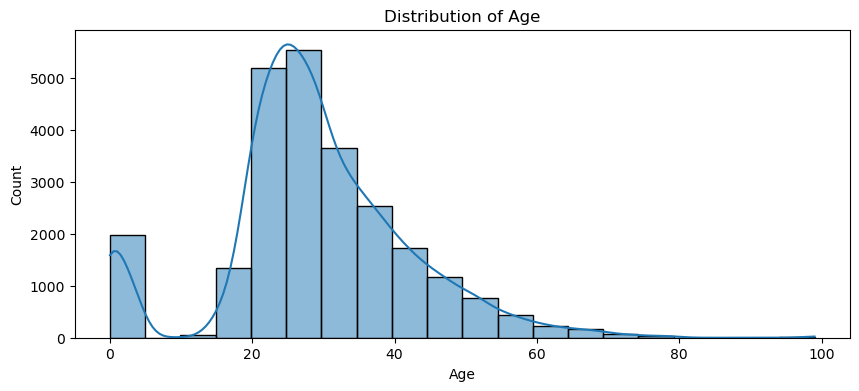

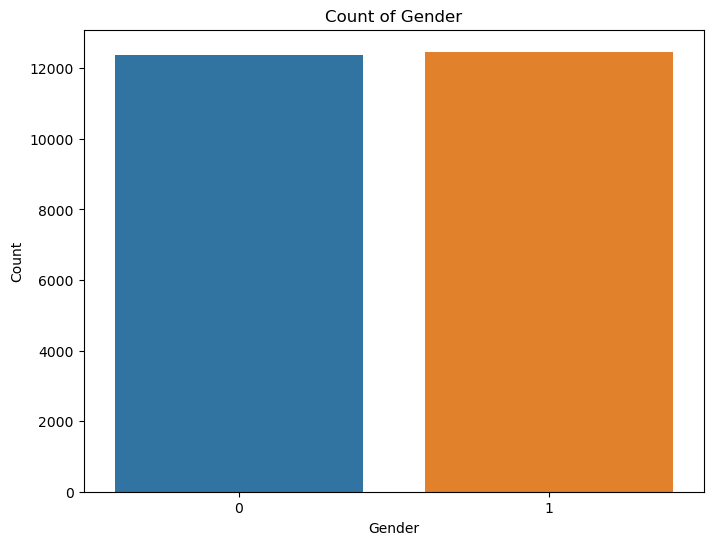

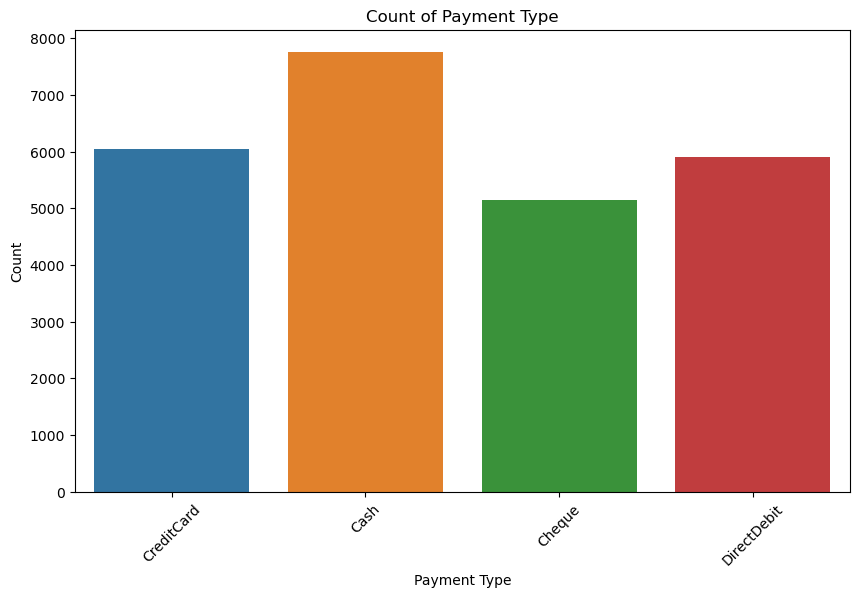

In [42]:
# Distribution of 'Price'
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

# Distribution of 'Age'
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Count of 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count of 'Payment Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pmttype')
plt.title('Count of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


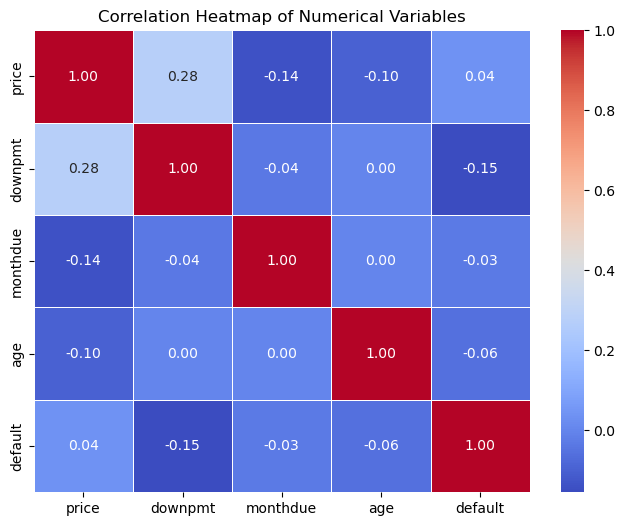

'price'

In [7]:
# Correlation heatmap of numerical variables
correlation_matrix = df[['price', 'downpmt', 'monthdue', 'age', 'default']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
max(correlation_matrix)

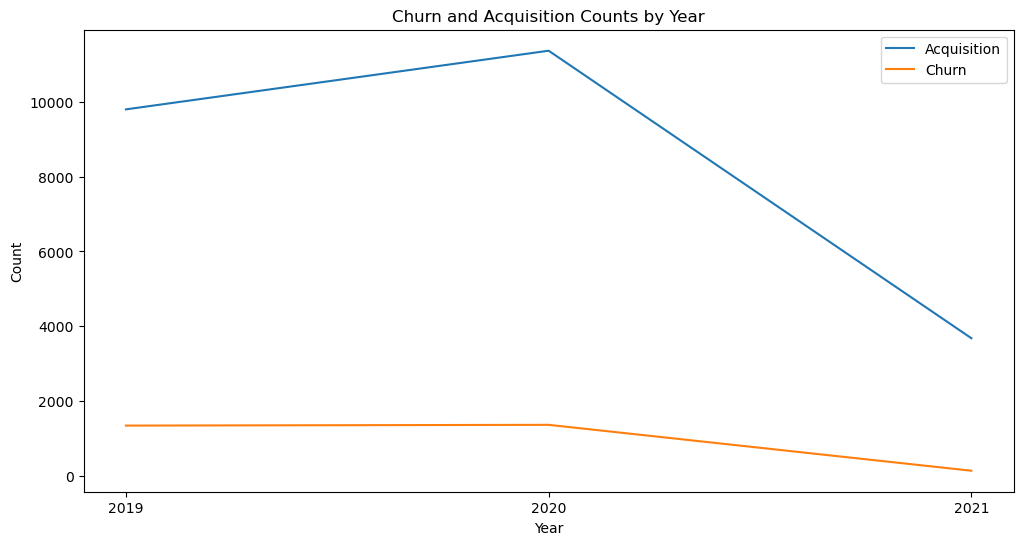

In [16]:
import numpy as np
# Calculate the churn and acquisition counts by year
df['enrollment_year'] = df['enrolldt'].dt.to_period('Y')
acquisition_counts = df['enrollment_year'].value_counts().sort_index()
churn_counts = df[df['default'] == 1]['enrollment_year'].value_counts().sort_index()

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(acquisition_counts.index.astype(str), acquisition_counts.values, label='Acquisition')
plt.plot(churn_counts.index.astype(str), churn_counts.values, label='Churn')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Churn and Acquisition Counts by Year')
plt.legend()

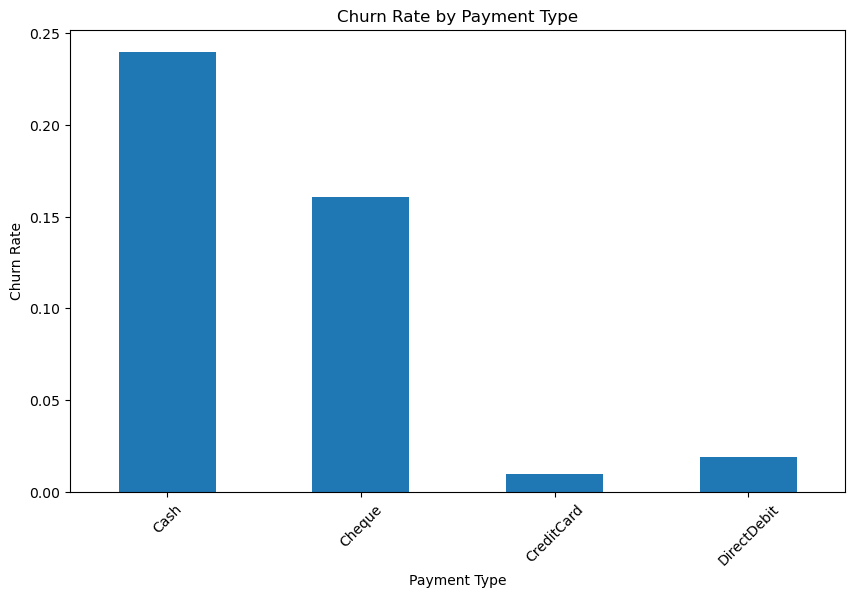

In [17]:

# Calculate the churn rate by payment type
payment_churn_counts = df[df['default'] == 1]['pmttype'].value_counts()
payment_total_counts = df['pmttype'].value_counts()
churn_rate = payment_churn_counts / payment_total_counts

# Create a bar plot
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Type')
plt.xticks(rotation=45)

plt.show()

<Figure size 1000x600 with 0 Axes>

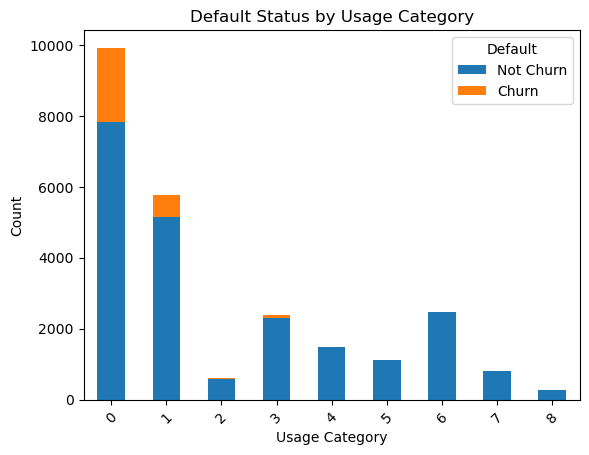

In [18]:
# Create a bar plot to show the distribution of 'default' by 'use' category
plt.figure(figsize=(10, 6))
df.groupby(['use', 'default']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Usage Category')
plt.ylabel('Count')
plt.title('Default Status by Usage Category')
plt.legend(title='Default', labels=['Not Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Significant Column would be used:
#Enrolldt (Enrollment Date)
#Default (Churn 1), Non-Default (Non-Churn 0)
#Use →Binned frequency of use (0 is lowest, 8 is highest frequency of use)
#Pmttype → payment type used by members
#Age 

In [21]:
# Logistics regression
#to predict the 'default' variable based on other independent variables.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
df = pd.read_excel('Fitness Club Data V4.xlsx')

# Data Preprocessing
# Encode categorical variables (e.g., 'use' and 'pmttype') using one-hot encoding
df = pd.get_dummies(df, columns=['pmttype'], drop_first=True)

# Normalize numerical variables
scaler = StandardScaler()
numerical_cols = ['price', 'age', 'use',]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split the data into features (X) and target (y)
X = df.drop('default', axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_report)

#accuracy: the model correctly predicted the default status (churn or not churn) for 88.09%
#f-1score: low precision and recall for the "churn" class, resulting in a low F1-score. 
#This indicates that the model is not effectively identifying cases of churn and is mainly predicting "not churn."

Accuracy: 0.8808613403099215
Confusion Matrix:
 [[4377    0]
 [ 592    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      4377
           1       0.00      0.00      0.00       592

    accuracy                           0.88      4969
   macro avg       0.44      0.50      0.47      4969
weighted avg       0.78      0.88      0.83      4969



/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Decision Tree
#may help in identifying factors that influence churn.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_excel('Fitness Club Data V4.xlsx')

# Data Preprocessing
# Encode categorical variables (e.g., 'use' and 'pmttype') using one-hot encoding
df = pd.get_dummies(df, columns=['use', 'pmttype'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('default', axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_report)


Accuracy: 0.8941436908834776
Confusion Matrix:
 [[4116  261]
 [ 265  327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4377
           1       0.56      0.55      0.55       592

    accuracy                           0.89      4969
   macro avg       0.75      0.75      0.75      4969
weighted avg       0.89      0.89      0.89      4969



In [ ]:
# aquisiont vs churn
# method: Logistic regression & Decision Trees
# Classification report → F-1 score, recall, precision, accuracy.
# ROC curve → > 50% refers a good performance model.

